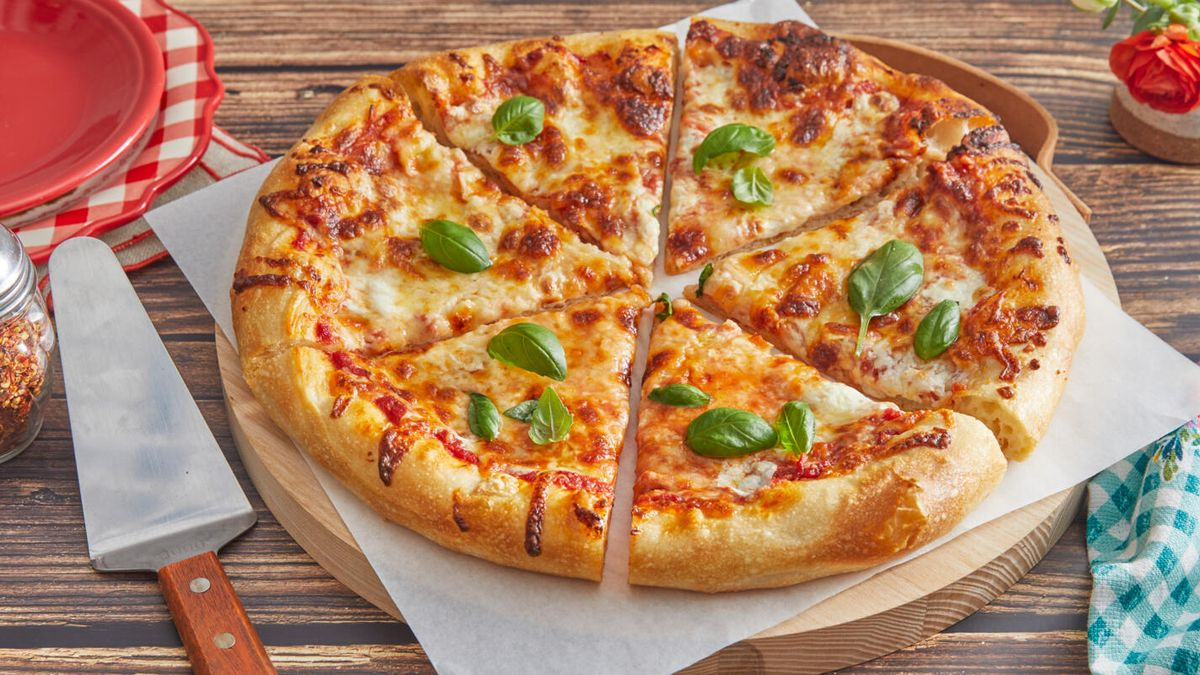

The folowing dataset is on pizza orders sourced from Kaggle. We will assume its for one of Pizza Hut's pizzeria's in Kenya.

Our business problem is to analyze the dataset and pinpoint areas with potential for maximization(unused capacity), cost-cutting and unseen trends.

Generally, Pizza hut wants this data to be used in maximizing the Business' potential.

In [1]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#load dataset into a dataframe
df=pd.read_csv("/content/pizza_sales.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12315 entries, 0 to 12314
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           12315 non-null  float64
 1   order_id           12315 non-null  float64
 2   pizza_name_id      12315 non-null  object 
 3   quantity           12315 non-null  float64
 4   order_date         12315 non-null  object 
 5   order_time         12314 non-null  object 
 6   unit_price         12314 non-null  float64
 7   total_price        12314 non-null  float64
 8   pizza_size         12314 non-null  object 
 9   pizza_category     12314 non-null  object 
 10  pizza_ingredients  12314 non-null  object 
 11  pizza_name         12314 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.1+ MB


The following is a description of the fields:

pizza_id: A unique identifier assigned to each distinct pizza variant available for ordering.

order_id: A unique identifier for each order made, which links to multiple pizzas.

pizza_name_id: An identifier linking to a specific name of the pizza.

quantity: The number of units of a specific pizza variant ordered within an order.

order_date: The date when the order was placed.

order_time: The time when the order was placed.

unit_price: The cost of a single unit of the specific pizza variant.

total_price: The aggregated cost of all units of a specific pizza variant in an order.

pizza_size: Represents the size of the pizza (e.g., small, medium, large).

pizza_category: Indicates the category of the pizza, such as vegetarian, non-vegetarian, etc.

pizza_ingredients: Provides a list or description of the ingredients used in the pizza.

pizza_name: Specifies the name of the specific pizza variant ordered.

We have 48620 data entries and 12 fields and
we need  to change order_date and order_time from object datatype to timestamp for data analysis purposes.

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [10]:
#let's clean the data
#convert order_time & order_date into timestamps
#concatenate 'order_date' and 'order_time' into a single string

df['order_datetime'] = df['order_date'] + ' ' + df['order_time']
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

In [11]:
#drop  null values

df=df.dropna()

DATA ANALYSIS

Now we statistically anallyze the data in search of insights.

In [ ]:
#get the frequencies of ingredients used

from collections import Counter
all_ingredients = ', '.join(df['pizza_ingredients'].dropna())
ingredients_list = [ingredient.strip() for ingredient in all_ingredients.split(',')]
ingredient_counts = Counter(ingredients_list)
ingredient_counts

Counter({'Sliced Ham': 2370,
         'Pineapple': 4685,
         'Mozzarella Cheese': 10333,
         'Pepperoni': 10300,
         'Mushrooms': 9624,
         'Red Onions': 19547,
         'Red Peppers': 16284,
         'Bacon': 4227,
         'Provolone Cheese': 1359,
         'Smoked Gouda Cheese': 1359,
         'Romano Cheese': 1359,
         'Blue Cheese': 1359,
         'Garlic': 27422,
         'Calabrese Salami': 1849,
         'Capocollo': 6572,
         'Tomatoes': 26601,
         'Green Olives': 6174,
         'Jalapeno Peppers': 5643,
         'Cilantro': 3341,
         'Corn': 3341,
         'Chipotle Sauce': 3341,
         'Chicken': 8443,
         'Thai Sweet Chilli Sauce': 2315,
         'Prosciutto di San Daniele': 1428,
         'Arugula': 1428,
         'Barbecued Chicken': 2372,
         'Green Peppers': 5224,
         'Barbecue Sauce': 2372,
         'Kalamata Olives': 3269,
         'Feta Cheese': 4748,
         'Beef Chuck Roast': 1406,
         'Spinach': 10012

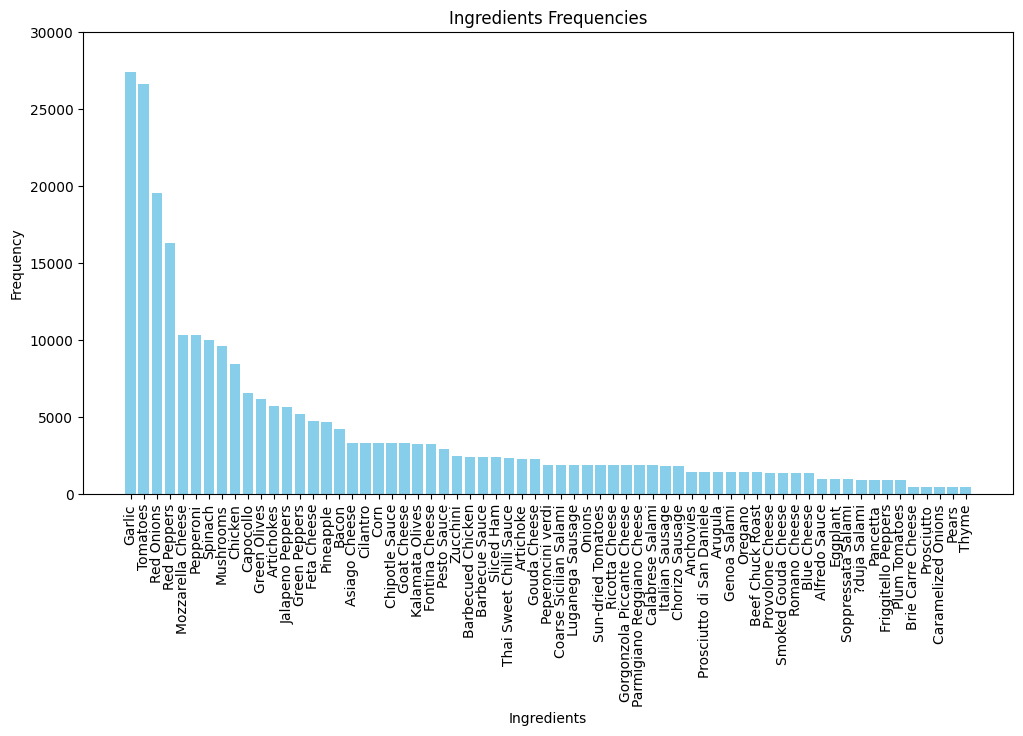

In [ ]:
# Sort ingredients by frequency in descending order

sorted_ingredients = dict(sorted(ingredient_counts.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(12, 6))
plt.bar(sorted_ingredients.keys(), sorted_ingredients.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title('Ingredients Frequencies')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.ylim(0,30000)
plt.show()

It's important for the company to have such insight.
Garlic, Tomatoes, Red Onions and Red peppers are the most used vegetables.

As a cost saving measure the company may ought to:
1. Acquire their suppliers as a form of vertical integration. This will reduce costs like transportation, shared resources will also reduce costs as one of the firms may have unused resources such as land.
This will also save the firm from unforeseen supply chain events like wars.

2. If they acquire some of their suppliers, Pizza hut could some of existing resources to grow other vegetables sourced elsewhere.
This, think long term, will cut off trasportation and buying costs ivesting the money elsewhere.

The company may also re-evaluate the use of some ingredients and weigh their cost/financial effects such as Pears, Briere Carre cheese, Thyme, Caramelized onions & Prosciutto.
They are rarely used thus worth evaluating.
Other factors like bulk purchasing for storage may work but may also increase costs like power for cold storage.


Now let's evaluate pizza_names. We will get the selling prices, frequency of sales and revenues brought in.
We will also establish if selling prices affect their sales.
We will assume each pizza_name has the same price a piece across the dataset

Considering size and category variations, we will use the average unit_price.

In [ ]:
# Group by 'pizza_name' and calculate the sum of 'quantity' and the mean of 'unit_price'

pizza_sales = df.groupby('pizza_name').agg({'quantity': 'sum', 'unit_price': 'mean'})
# Rename columns

pizza_sales = pizza_sales.rename(columns={'quantity': 'total_sales', 'unit_price': 'average_unit_price'})
# arrange by total sales in descending order

pizza_sales = pizza_sales.sort_values(by='total_sales', ascending=False)
print(pizza_sales)

                                            total_sales  average_unit_price
pizza_name                                                                 
The Classic Deluxe Pizza                         2453.0           15.575952
The Barbecue Chicken Pizza                       2432.0           17.572934
The Hawaiian Pizza                               2422.0           13.317194
The Pepperoni Pizza                              2418.0           12.468658
The Thai Chicken Pizza                           2371.0           18.286069
The California Chicken Pizza                     2370.0           17.448523
The Sicilian Pizza                               1938.0           15.963831
The Spicy Italian Pizza                          1924.0           18.104663
The Southwest Chicken Pizza                      1917.0           18.080504
The Big Meat Pizza                               1914.0           12.000000
The Four Cheese Pizza                            1902.0           16.951946
The Italian 

In [ ]:
#let's get the mode price(selling price used most)

mean_unit_price = df['unit_price'].mean().round(1)
mean_unit_price

16.5

In [ ]:
median_unit_price = df['unit_price'].median()
median_unit_price

16.5

The Brie Carre Pizza is the costliest pizza at 23.65 USD a piece.It's also the least bought pizza.
We can associate the price to the low sales.

The Best Selling Pizzas range from 12-18 USD. Three of them have chicken as an ingredient.
That means customers love chicken based pizzas even at a higher selling price ranging from 17-18 USD.
This may be good food for thought as acquiring a chicken supplier will significantly lower Pizza Hut's costs, if all goes well, then lower  the chicken based pizza's prices to hypothetically increase sales by having a competitive advantage over rivals.

Pizza Hut could also evaluate how to bring the pieces with less than 1000 sales a notch higher.
Different startergies could be analysed and used e.g., increasing awareness & price cuts.

The mean & median unit_price fall on 16.5 USD making it the most friendly selling price.
With a good price if possible and increased awareness, some of the pizzas may move faster.

Let's now analyze the total_prices to deduct insights like:
1. which day brings in the highest/lowest revenues
2. which month as well
3. which hour (this will help in shift management using real data)


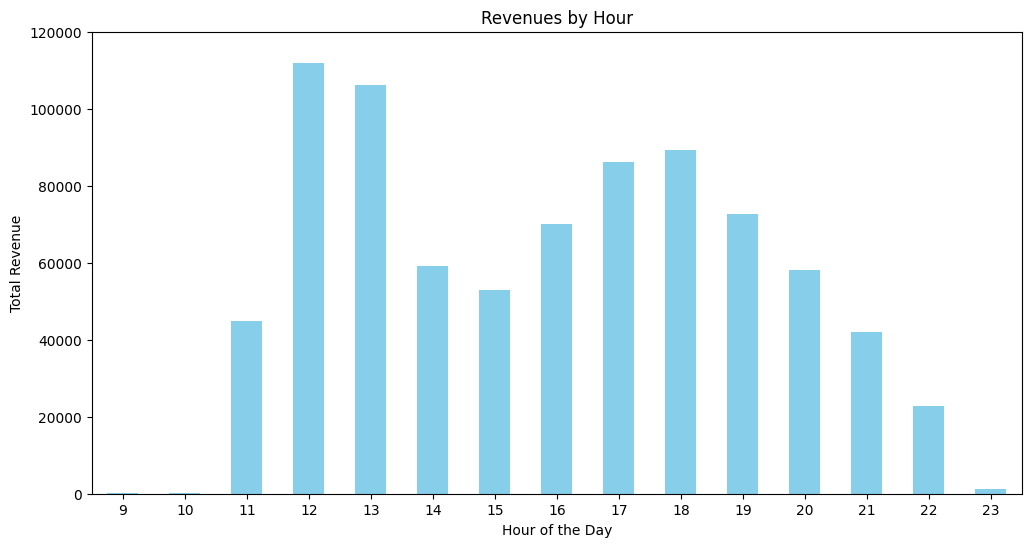

In [ ]:
#let's analyze by hour

revenue_by_hour = df.groupby(df['order_datetime'].dt.hour)['total_price'].sum()
plt.figure(figsize=(12, 6))
revenue_by_hour.plot(kind='bar', color='skyblue')
plt.title('Revenues by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.ylim(0,120000)
plt.show()


1500 hrs- 1800 hrs are very unique hours as there is a gradual increase of sales per hour spread across.
This means anything needed to move fast, Pizza Hut should maximize these hours e.g., by using sweet deals.

Also shifts could be arranged to have a higher number of staff during these hours to prevent burn out and inefficiencies.

0900-1000 hrs and 2000-2300 hrs require the least number of staff as there is little and decreasing activities respectively. This will help in effective shift management.

Staff could be increased at 1000 hrs to serve the busiest hours that follow efficiently.

Resources could be maximised and work spaces assesed to improve and maintain short wait periods to ensure customers are happy and serve as high numbers as possible effectively.

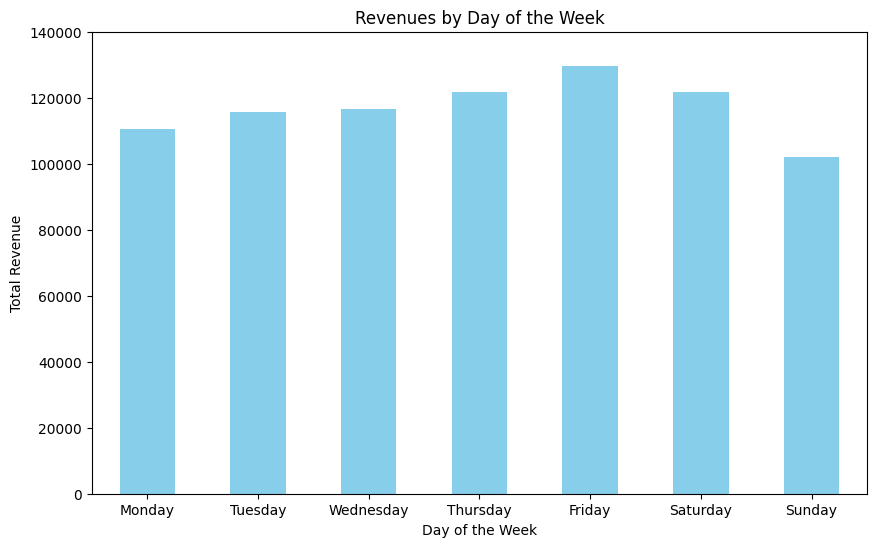

In [ ]:
#let's get sales by days of the week
# extract the day of the week from the 'order_datetime' field

df['day_of_week'] = df['order_datetime'].dt.day_name()
# Group by days and calculate total revenues for each day

revenue_by_day = df.groupby('day_of_week')['total_price'].sum()
# arrange days in the correct order

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = revenue_by_day.reindex(days_order)

plt.figure(figsize=(10, 6))
revenue_by_day.plot(kind='bar', color='skyblue')
plt.title('Revenues by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.ylim(0,140000)
plt.show()

Revenues per days of the week will assist in preparation for sales.
For example Friday, Thursday and Saturday have the highest sales.

Pizza Hut could maximize on this by upselling and cross-selling more and more.
This is because people come in ready to spend and good up/cross-selling deals may easily be embraced.

On Monday's, Tuesday's, Wednesday's & Sunday's, Pizza Hut could use sweet deals that attract customers who may have not come otherwise.
With caution though to avoid losses.

Notably, revenues increase from Monday to Friday gradually with a decrease from Saturday-Sunday.

Tailored marketing for enjoying Pizza on Sunday's could be used to improve the week's lowest performing day.

Shift wise, this may also reflect a good number of staff could have their off days on Sunday, Monday & Wednesday.

The others may spread on Saturday and Thursday, retaining a good number as these are busy days.

Let's evaluate which pizza sizes & categories sold best. We will get this via frequency.

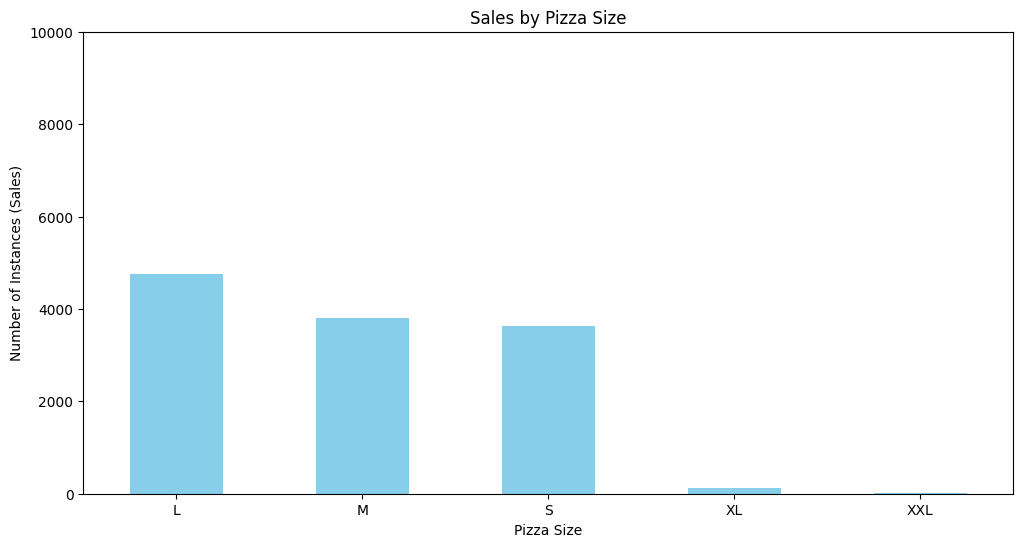

In [ ]:
#group by sizes and categories

sales_by_size = df.groupby('pizza_size').size()
sales_by_category = df.groupby('pizza_category').size()
#visualize the instances


plt.figure(figsize=(12, 6))
sales_by_size.plot(kind='bar', color='skyblue')
plt.title('Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Number of Instances (Sales)')
plt.xticks(rotation=0)
plt.ylim(0,10000)
plt.show()


Large is the best seller!
XL and XXL sell poorly thus Pizza Hut may evaluate if it makes economic sense to sell them considering they use the most ingredients and time.

Pizza Hut may want to maximize profits from the sizes, they could improve factors of production for example;

1. More automation to do more with less resources that is time, energy and labor force.
2. Re-negotiate terms with suppliers.
3. Buy out some suppliers to gain control.

If possible,they could sell at the same price while earning more.
Pizza Hut may also evaluate the most profitable size and push its sales.

Let's evaluate  at what time does Large and small move most.
This information will help do targeted marketing.

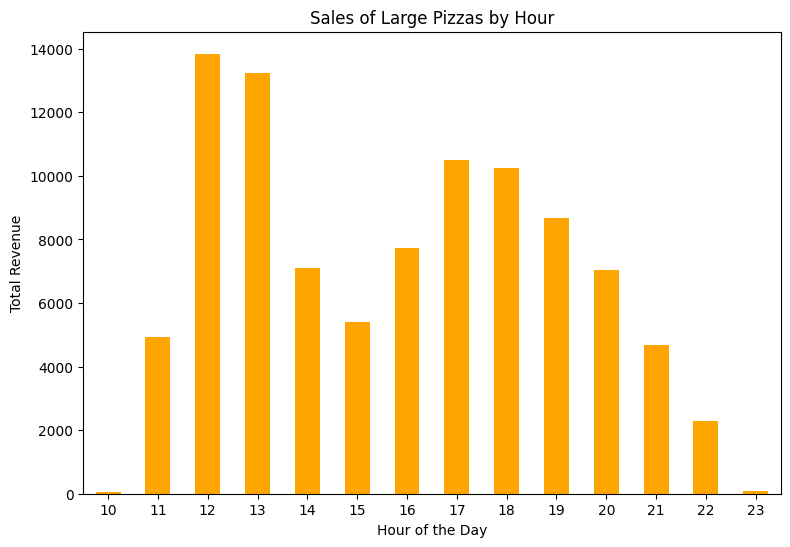

In [ ]:
large_pizza_data = df[df['pizza_size'] == 'L']
large_pizza_sales_by_hour = large_pizza_data.groupby(large_pizza_data['order_datetime'].dt.hour)['total_price'].sum()

plt.figure(figsize=(9, 6))
large_pizza_sales_by_hour.plot(kind='bar', color='orange')
plt.title('Sales of Large Pizzas by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

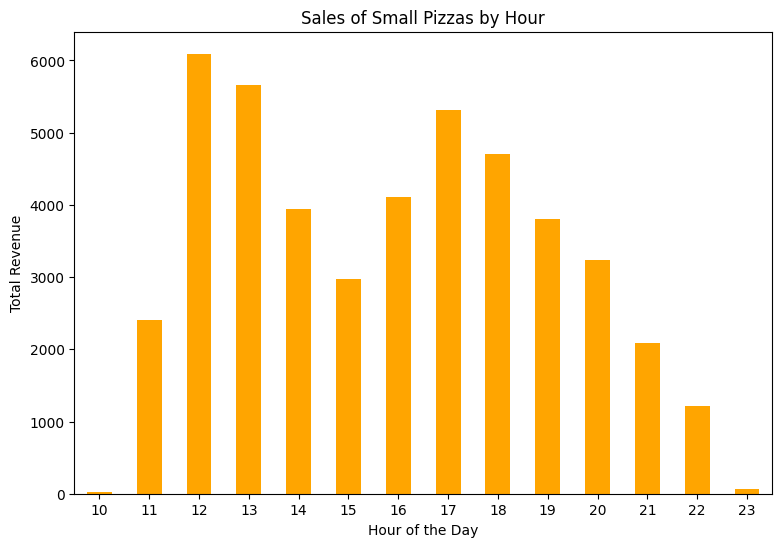

In [ ]:
small_pizza_data = df[df['pizza_size'] == 'S']
small_pizza_sales_by_hour = small_pizza_data.groupby(small_pizza_data['order_datetime'].dt.hour)['total_price'].sum()

plt.figure(figsize=(9, 6))
small_pizza_sales_by_hour.plot(kind='bar', color='orange')
plt.title('Sales of Small Pizzas by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

The observation's are similar to the pizzeria's in general. Meaning they sell best when there is foot traffic.

This means it may just be necessary to promote the pizza in general without targeting the size if hour of the day is being considered as a metric.

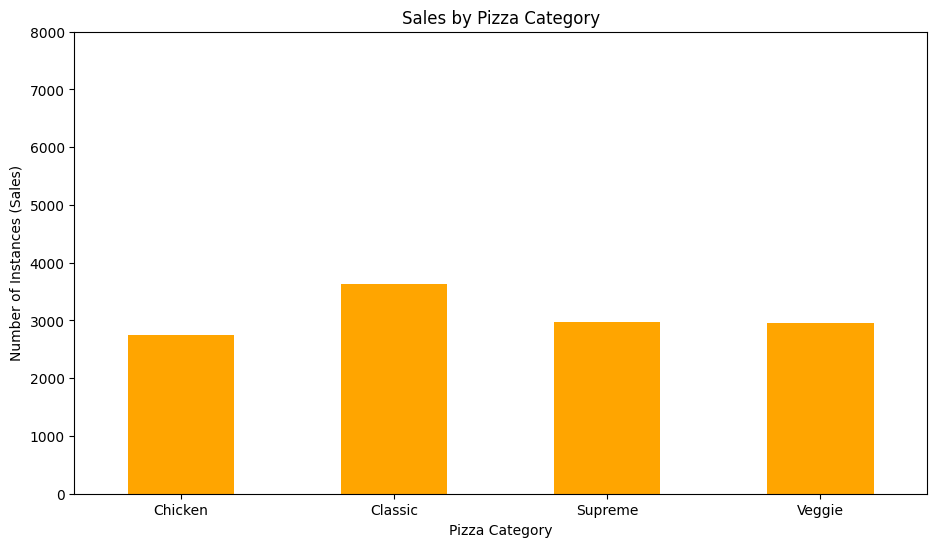

In [ ]:
# Plotting for pizza category

plt.figure(figsize=(11, 6))
sales_by_category.plot(kind='bar', color='orange')
plt.title('Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Number of Instances (Sales)')
plt.xticks(rotation=0)
plt.ylim(0,8000)
plt.show()

To make more effortlessly, Pizza Hut could lower costs of producing Classic pizzas. If possible, more cash would be realized without increasing prices.

Let's do a number of tests on the categories;
1. plot a time-series chart to see how the Veggie category is coming through.
2. evaluate ingredients used in a classic pizza to see which costs can be brought down

In [ ]:
#get ingredients used in a classic pizza

classic_data = df[df['pizza_category'] == 'Classic']
#extract unique ingredients

unique_ingredients_classic = set(', '.join(classic_data['pizza_ingredients'].dropna()).split(', '))
print("Ingredients used in the 'Classic' category:")
for ingredient in unique_ingredients_classic:
    print(ingredient)

Ingredients used in the 'Classic' category:
Green Olives
Mushrooms
Oregano
Anchovies
Sliced Ham
Red Peppers
Italian Sausage
Green Peppers
Goat Cheese
Red Onions
Pepperoni
Mozzarella Cheese
Pineapple
Capocollo
Garlic
Tomatoes
Feta Cheese
Kalamata Olives
Chorizo Sausage
Bacon
Beef Chuck Roast


If a supplier supplys several of those and has resources for more, it would be a good idea if done well to buy them out.

Say, Tomatoes, Garlic, Red Onions, Green Peppers, Red Peppers & Oregano could come from one source if all resources are utilized/ expanded.

Pizza Hut could lower some costs by merging resources and reap the surplus cash, and invest it elsewhere.

This is being analyzed as Classic pizzas are the best sellers thus the savings would be realized effectively.

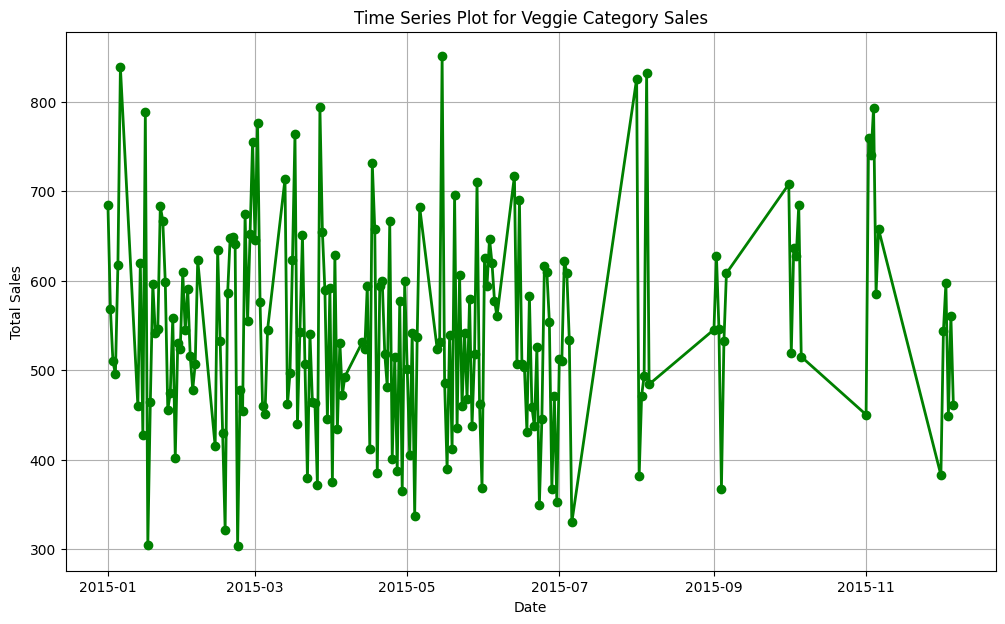

In [ ]:
#time-series plot for veggie type

veggie_data = df[df['pizza_category'] == 'Veggie'] # Filter data for 'Veggie' category

veggie_sales_by_date = veggie_data.groupby(veggie_data['order_datetime'].dt.date)['total_price'].sum()
plt.figure(figsize=(12, 7))
veggie_sales_by_date.plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Time Series Plot for Veggie Category Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Veggie category has had cycles of consumption i.e., booms and troughs thus unlikely to tell its trend from the plot.

Let's assess the pizza's by name as they represent every backend operation.

We will evaluate the field by frequency of sales and revenues earned.

In [ ]:
#group pizzas by name and test for revenues and frquency

pizza_revenues_and_sales = df.groupby('pizza_name').agg({'total_price': 'sum', 'pizza_id': 'count'})
pizza_revenues_and_sales = pizza_revenues_and_sales.rename(columns={'total_price': 'total_revenue', 'pizza_id': 'sales_count'})
#Sort the results by total revenue in descending order for test 1

pizza_revenues_and_sales = pizza_revenues_and_sales.sort_values(by='total_revenue', ascending=False)
print(pizza_revenues_and_sales)


                                            total_revenue  sales_count
pizza_name                                                            
The Barbecue Chicken Pizza                       11236.25          622
The Thai Chicken Pizza                           10568.50          574
The California Chicken Pizza                     10524.25          586
The Classic Deluxe Pizza                          8927.50          569
The Spicy Italian Pizza                           8697.00          465
The Southwest Chicken Pizza                       8538.75          468
The Four Cheese Pizza                             8282.80          474
The Italian Supreme Pizza                         8175.00          455
The Sicilian Pizza                                8075.75          494
The Hawaiian Pizza                                7991.75          591
The Pepperoni Pizza                               7984.75          627
The Five Cheese Pizza                             7011.50          370
The Gr

The chicken based pizzas bring in the most revenues, again reflecting how much they are loved at their unique price point.

Pizza Hut would save lot's of money if they were able to bring the costs of chicken down.
![enjoying.jpg](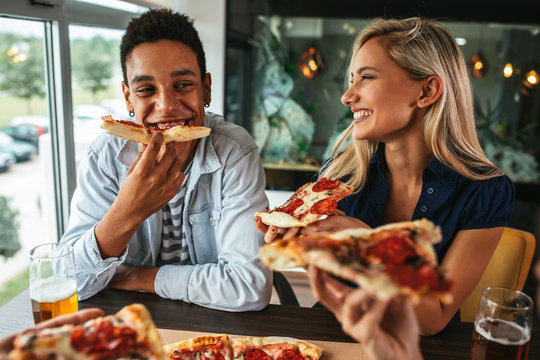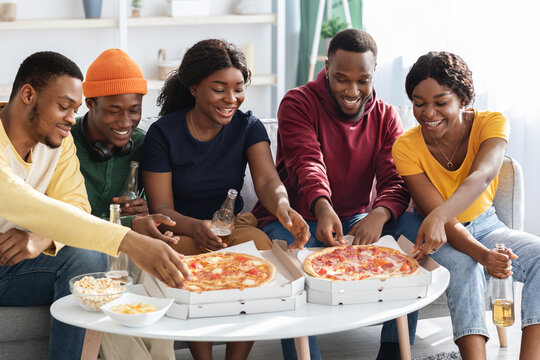)
Let's plot a percentage share of revenues from chicken based pizza

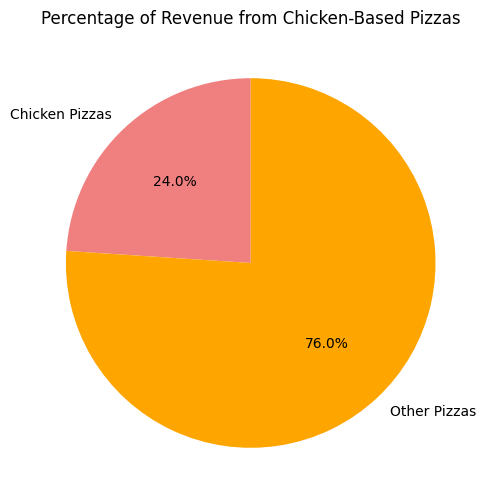

In [15]:
#filter data for pizzas with chicken

chicken_pizza_data = df[df['pizza_name'].str.contains('Chicken', case=False, na=False)]
#calculate the total revenue from chicken-based pizzas

total_chicken_revenue = chicken_pizza_data['total_price'].sum()
#calculate the total revenue from all pizzas

total_revenue = df['total_price'].sum()
#calculate the percentage of total revenue from chicken-based pizzas

percentage_chicken_revenue = (total_chicken_revenue / total_revenue) * 100

#Plot on a pie chart

labels = ['Chicken Pizzas', 'Other Pizzas']
sizes = [percentage_chicken_revenue, 100 - percentage_chicken_revenue]
colors = ['lightcoral', 'orange']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Revenue from Chicken-Based Pizzas')
plt.show()

24% of revenues is a big piece coming from one constant ingredient. This is saying a quarter of the revenues come from chicken-based pizzas.

This positively correlates with huge savings from bringing the costs of acquiring chicken down.

In [ ]:
#Sort the results by frquency in descending order for test 1

pizza_revenues_and_sales = pizza_revenues_and_sales.sort_values(by='sales_count', ascending=False)
print(pizza_revenues_and_sales)


                                            total_revenue  sales_count
pizza_name                                                            
The Pepperoni Pizza                               7984.75          627
The Barbecue Chicken Pizza                       11236.25          622
The Hawaiian Pizza                                7991.75          591
The California Chicken Pizza                     10524.25          586
The Thai Chicken Pizza                           10568.50          574
The Classic Deluxe Pizza                          8927.50          569
The Sicilian Pizza                                8075.75          494
The Four Cheese Pizza                             8282.80          474
The Southwest Chicken Pizza                       8538.75          468
The Spicy Italian Pizza                           8697.00          465
The Big Meat Pizza                                5760.00          459
The Italian Supreme Pizza                         8175.00          455
The Ve

The essence of sorting by frequency is the results best reflect customers' favourites'.
The Pepperoni Pizza & The Barbecue Chicken Pizza are the best sellers with more than 600 sales each.
They may be upsold, especially the Large size as it rakes in more revenues.
They may also be cross sold with attractive accompaniments that will drive up revenues and profits.
Accompaniments that have low costs of production will help rake more profits.

In general, the best-sellers reflect love from customers and may be used to manipulate profits with a little ease than the wosrt selling pizzas.

The least selling pizza's could be helped by awareness, i.e., being the only free variants offered in deals.

They could also be the only ones with a promotion forcing budget-oriented customers to try them out and discover them.
They could also be paired with free accompaniments that may be new or sell.People may buy the pizza to get the free cross-sells'.

These measures help increase awareness of these variants and monitor for results.


**CONCLUSION**

We have drawn many useful insights from the dataset purposed to help Pizza Hut cut-costs, improve workplace efficiency, unearth oppurtunities and maximize profits.

1. Acquiring a chicken supplier would help bring down costs of production for chicken based pizzas.
This is because they are the best sellers and keeping some extra dollars per sale improves Pizza Hut's financial health.

2. Acquiring a vegetables supplier would also help cut costs of production first with the control to maximise/expand common resources and ability to absorb shock from events that manipulate prices.

Sourcing all vegetables from one/two suppliers would also help cut costs like logistics.

3. Up/Cross selling is best done with Pepperoni Pizza, Hawaiian & The Barbecue Chicken Pizza because they are the fastest moving which positively correlates with customer preference. This improves chances for up/cross selling being succesfull.

4. The worst selling could be used in a promotion deal with it being offered with a free beloved piece, say, Buy 1 Large Mediterranean Pizza and get a Small Pepperoni Pizza! or any other suitable method.
It could also be paired with free accompaniments.
The aim is to improve awareness.

5. Thursday, Friday & Saturday have the highest sales. They should be utilized for up/cross selling as people spend more.
They also need a higher number of staff than the other days.
This may mean a lesser number of offs within the three days.

6. Sunday has the lowest revenues which we translate to less activity. A higher number of staff could have their offs then all the way to Wednesday.

7. Pizza Hut could consider dropping sizes XL & XXL as they bring in the lowest revenues. Their dropping could help utilize resources efficiently.

In addition to that they should maximize revenues from Large size as possible, being the fastest moving. Could be realized by minimizing costs of production.

8. There is gradual increase of activity from 1500-1800 hrs. Meaning a higher number of staff needed then to enhance efficiency and customer satisfaction.

The highest revenues are realized between 1100-1300 hrs, staff number should be higher at this point as well.
Staff numbers would be decreased between 2000-2300 hrs as there is gradual decrease in activity.